In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('BeerDataScienceProject.tar.bz2', compression='bz2', encoding='latin-1')

In [4]:
data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [5]:
data.shape # 528870 rows and 13 columns imported

(528870, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [7]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

In [8]:
data[['review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma']].describe()

,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,3.864522,3.758926,3.833197,3.765993,3.817350
std,0.604010,0.685335,0.709962,0.669018,0.718903
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.500000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
data = data[data['review_appearance'] >0]
data = data[data['review_overall'] >0]

In [10]:
data.shape

(528867, 13)

In [11]:
data = data.dropna()

In [12]:
data.shape

(508355, 13)

A user can leave multiple reviews for the same beer at different times. When multiple reviews for the same beer by the same user is present in the dataset, we only want the highest review given by a user for the beer. We remove duplicates.

In [13]:
df = data.sort_values('review_overall', ascending=False).drop_duplicates(['review_profileName', 'beer_beerId'], keep='first')

In [14]:
df.shape

(503697, 13)

In [15]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
152866,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.5,4.0,5.0,4.5,ken2cart1,4.0,22 oz bomber served in my 8 ounce flute glass ...,1243562965
370806,10.0,28385,22,Unibroue 15,Belgian Strong Pale Ale,4.0,4.0,5.0,4.5,Gehrig,4.5,I grabbed this at the terrific Neil St. Piccad...,1206337414
412412,6.0,11547,73,Great Lakes Independence Ale,American Amber / Red Ale,4.0,4.0,5.0,4.0,sliverX,5.0,Poured from a growler a clear copper brew with...,1278717598
79616,5.6,279,140,Sierra Nevada Porter,American Porter,4.5,4.5,5.0,4.5,pbrian,5.0,I love this beer. It has that signature Sierra...,1014202494
46458,4.4,429,1,Pilsner Urquell,Czech Pilsener,4.5,4.0,5.0,4.5,schusterbauer,4.5,i seem to remember not being so impressed by t...,1174915272


# Question 1

# Rank the top 3 breweries which produce the strongest beers (a beer's strength is determined by its ABV content)

In [16]:
df1= df.groupby('beer_brewerId')['beer_ABV'].mean().to_frame('avg_ABV').reset_index()
df1 ['rank']= df1['avg_ABV'].rank(method='dense', ascending=False)
df1 = df1.sort_values('rank')
df1[df1['rank']<=3]

,beer_brewerId,avg_ABV,rank
699,6513,19.228824,1.0
165,736,13.750000,2.0
1466,24215,12.466667,3.0


# Question 2

# Which year did beers enjoy the highest ratings?

In [17]:
df['year'] =  pd.to_datetime(df.review_time, unit='s').dt.year

In [59]:
df2 = df.groupby('year')['review_overall'].mean().to_frame('avg_review_overall').reset_index().sort_values('avg_review_overall', ascending=False)
df2

,year,avg_review_overall
2,2000,4.241379
0,1998,4.045455
1,1999,4.000000
3,2001,3.970037
12,2010,3.869679
11,2009,3.868500
7,2005,3.845799
10,2008,3.840599
14,2012,3.839058
13,2011,3.833494


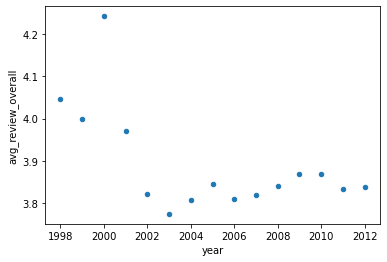

In [79]:
df2.plot(x='year', y='avg_review_overall', kind ='scatter')
plt.show()

# Question 3

# Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [89]:
df3 = df.groupby('beer_beerId')[['review_appearance', 'review_palette', 'review_taste', 'review_aroma', 'review_overall']].mean()
df3

,review_appearance,review_palette,review_taste,review_aroma,review_overall
beer_beerId,,,,,
5,3.488095,3.208333,3.323810,3.342857,3.554762
6,3.838691,3.516073,3.514925,3.645235,3.709529
7,3.251145,3.178626,3.110687,3.103817,3.271756
8,3.294118,3.080882,3.301471,3.235294,3.647059
9,3.051724,2.853448,3.103448,3.043103,3.400862
...,...,...,...,...,...
77302,3.000000,3.000000,3.500000,3.500000,3.500000
77303,4.500000,4.500000,5.000000,4.500000,5.000000
77305,4.000000,4.000000,3.500000,4.000000,4.000000


In [90]:
df3.corr()

,review_appearance,review_palette,review_taste,review_aroma,review_overall
review_appearance,1.000000,0.669148,0.682127,0.660223,0.637575
review_palette,0.669148,1.000000,0.756303,0.825980,0.766908
review_taste,0.682127,0.756303,1.000000,0.835088,0.823181
review_aroma,0.660223,0.825980,0.835088,1.000000,0.883871
review_overall,0.637575,0.766908,0.823181,0.883871,1.000000


The aroma is the most important factor for the beer and apperance is the least important factor

<AxesSubplot:>

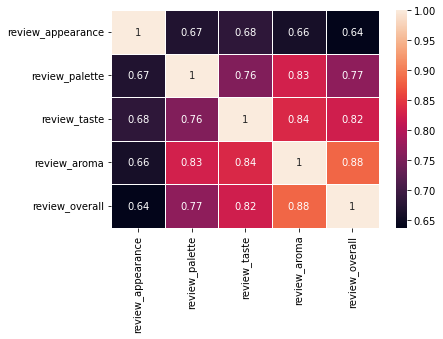

In [115]:
sns.heatmap(data=df3.corr(), annot=True, linewidth=1)

# Question 4

Recommend 3 beers based on this data?

I will consider the taste rating and the number of reviewers when deciding on 3 beers to recommend. 

In [199]:
df4 = df.groupby('beer_beerId')['review_taste'].agg(['count','mean']).reset_index()
df4 = df4.rename(columns={'count':'no_reviews','mean':'avg_taste_review'})
df4 = df4.sort_values('avg_taste_review', ascending =False)
df4.head(10)

,beer_beerId,no_reviews,avg_taste_review
5671,32185,1,5.0
3925,22056,1,5.0
14253,74221,1,5.0
12505,66430,1,5.0
10719,57994,1,5.0
9644,52825,1,5.0
8156,45944,1,5.0
9650,52862,2,5.0
12497,66415,1,5.0
14937,77045,1,5.0


From this result, I cannot recommend any of the top 3 beers as the number of reviewers are very small and the opinion of the one or 2 reviewers can be skewed

In [200]:
df4[['no_reviews', 'avg_taste_review']].describe()

,no_reviews,avg_taste_review
count,14990.000000,14990.000000
mean,33.602201,3.578096
std,140.888150,0.582713
min,1.000000,1.000000
25%,1.000000,3.264093
50%,3.000000,3.666667
75%,10.000000,4.000000
max,2928.000000,5.000000


We can see from the above result that over 50% of reviews have less than 3 reviews. We can plot to get a better understanding

array([[<AxesSubplot:title={'center':'no_reviews'}>]], dtype=object)

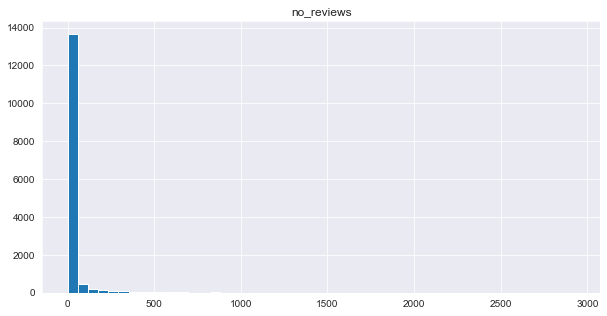

In [312]:
df4.hist(column='no_reviews', bins=50, figsize=(10,5))

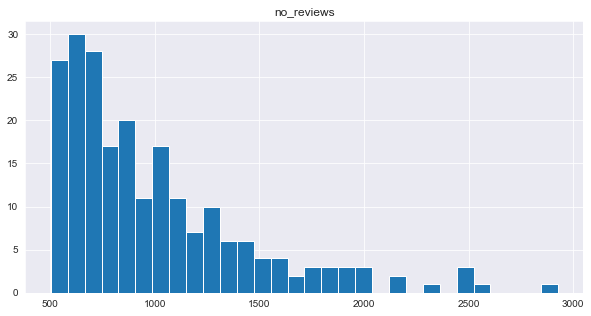

In [313]:
vis1 = df4[df4['no_reviews'] > 500].hist(column="no_reviews", bins=30, figsize=(10, 5))

I will recommend beers with the highest ratings and over 1500 reviews over the years

In [334]:
df4[df4['no_reviews']>1500].sort_values('avg_taste_review', ascending=False)

,beer_beerId,no_reviews,avg_taste_review
3561,19960,1873,4.479178
123,645,2170,4.430876
2086,11757,2443,4.388866
13,34,2477,4.264029
336,1696,1560,4.244551
485,2512,2005,4.242643
611,3158,1877,4.225093
105,571,2024,4.200840
2828,15881,1878,4.193024
47,226,1645,4.164438


In [335]:
#I will recommend the 3 beers listed below
df[(df["beer_beerId"] == 19960) | (df["beer_beerId"] == 645) | (df["beer_beerId"] == 11757)].drop_duplicates(
    subset="beer_beerId")

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
23813,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,5.0,4.0,5.0,5.0,taulpepper,5.0,Been looking for this one for a while. It was ...,1323230694,2011
34491,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,3.0,4.5,5.0,4.5,AlCaponeJunior,5.0,Was able to get a single four pack of the late...,1300571216,2011
341145,11.3,645,207,Trappistes Rochefort 10,Quadrupel (Quad),4.5,5.0,5.0,5.0,ohitsbrad,5.0,"29 December 2005, Best Before May 09 Appears m...",1135882974,2005
